In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
DATASET_LOCATION = "../datasets/small-imc21"

In [3]:
rtt_df = pd.read_csv(DATASET_LOCATION+ "/s_SITE_RTT.csv.gz", compression="gzip")

In [4]:
rtt_guangzhou = rtt_df.loc[rtt_df["from_site_id"].str.startswith("guangzhou")]

print(rtt_guangzhou.head())
print(rtt_guangzhou["to_site_id"].unique())

rtt_guangzhou_telecom = rtt_guangzhou[rtt_guangzhou["from_site_id"] == "guangzhou-telecom"].copy()
rtt_guangzhou_cmcc = rtt_guangzhou[rtt_guangzhou["from_site_id"] == "guangzhou-cmcc"].copy()

rtt_guangzhou_telecom.sort_values(by="biz_ts", inplace=True)
rtt_guangzhou_cmcc.sort_values(by="biz_ts", inplace=True)

          from_site_id     to_site_id      rtt  loss  type      biz_ts  \
586  guangzhou-telecom  wuhan-telecom  17.4370   0.0  icmp  1590940819   
587  guangzhou-telecom  wuhan-telecom  17.3998   0.0  icmp  1590940939   
588  guangzhou-telecom  wuhan-telecom  17.7135   0.0  icmp  1590941059   
589  guangzhou-telecom  wuhan-telecom  21.2967   0.0  icmp  1590941160   
590  guangzhou-telecom  wuhan-telecom  21.3710   0.0  icmp  1590941280   

                biz_time          create_time  
586  2020-06-01 00:01:00  2020-06-01 00:01:09  
587  2020-06-01 00:03:00  2020-06-01 00:03:07  
588  2020-06-01 00:05:00  2020-06-01 00:05:10  
589  2020-06-01 00:07:00  2020-06-01 00:07:05  
590  2020-06-01 00:09:00  2020-06-01 00:09:06  
['wuhan-telecom' 'nanjing-cmcc' 'kunming-telecom' 'wuhan-cmcc'
 'wuxi-telecom_unicom_cmcc' 'chengdu-cmcc' 'shenzhen-telecom_unicom_cmcc']


In [5]:
print(rtt_df.columns)

Index(['from_site_id', 'to_site_id', 'rtt', 'loss', 'type', 'biz_ts',
       'biz_time', 'create_time'],
      dtype='object')


In [6]:
# Analyze RTT from Guangzhou Telecom
to_site_ids = sorted(rtt_guangzhou_telecom["to_site_id"].unique())
for site_id in to_site_ids:
    subset_df = rtt_guangzhou_telecom[rtt_guangzhou_telecom["to_site_id"]==site_id]
    print("RTT statistics to site ID {}".format(site_id))
    print(subset_df["rtt"].describe())
# fig = plt.figure(figsize=(17,10))
# plt.scatter(rtt_guangzhou_telecom_shenzen["biz_ts"], rtt_guangzhou_telecom_shenzen["rtt"])

RTT statistics to site ID kunming-telecom
count    43196.000000
mean        31.484550
std          5.463564
min         22.573900
25%         26.084675
50%         30.816900
75%         35.914950
max         51.771000
Name: rtt, dtype: float64
RTT statistics to site ID shenzhen-telecom_unicom_cmcc
count    43196.000000
mean         6.797599
std          1.718587
min          0.000000
25%          5.757500
50%          6.217300
75%          7.160300
max         45.784300
Name: rtt, dtype: float64
RTT statistics to site ID wuhan-telecom
count    42643.000000
mean        21.393584
std          3.763352
min         15.828500
25%         18.064800
50%         20.679900
75%         23.020800
max         40.978500
Name: rtt, dtype: float64
RTT statistics to site ID wuxi-telecom_unicom_cmcc
count    43196.000000
mean        38.958246
std          5.299203
min         29.833300
25%         32.938550
50%         40.494900
75%         43.191800
max        142.579700
Name: rtt, dtype: float64


In [7]:
# Analyze RTT from Guangzhou CMCC
to_site_ids = sorted(rtt_guangzhou_cmcc["to_site_id"].unique())
for site_id in to_site_ids:
    subset_df = rtt_guangzhou_cmcc[rtt_guangzhou_cmcc["to_site_id"]==site_id]
    print("RTT statistics to site ID {}".format(site_id))
    print(subset_df["rtt"].describe())

RTT statistics to site ID chengdu-cmcc
count    43063.000000
mean        38.143780
std         62.878768
min          0.000000
25%         35.719850
50%         36.479800
75%         37.057850
max       2707.755600
Name: rtt, dtype: float64
RTT statistics to site ID nanjing-cmcc
count    42018.000000
mean        35.102105
std          1.367519
min          0.000000
25%         34.602300
50%         35.192300
75%         35.728075
max        134.125400
Name: rtt, dtype: float64
RTT statistics to site ID wuhan-cmcc
count    43063.000000
mean        17.567778
std          1.381236
min          0.000000
25%         16.904050
50%         17.647700
75%         18.343000
max         25.374500
Name: rtt, dtype: float64
RTT statistics to site ID wuxi-telecom_unicom_cmcc
count    43063.000000
mean        33.143816
std          1.090425
min          0.000000
25%         32.492950
50%         33.171100
75%         33.806950
max         37.909600
Name: rtt, dtype: float64


In [8]:
unique_from_site_ids  = sorted(rtt_df["from_site_id"].unique())
unique_to_site_ids = sorted(rtt_df["to_site_id"].unique())

# 2D matrix plot
rtt_site_indices = [[0 for _ in range(len(unique_to_site_ids))] for _ in range(len(unique_from_site_ids))]


# Populate the matrix
for from_site_id in unique_from_site_ids:
    subset_df = rtt_df[rtt_df["from_site_id"]==from_site_id]
    to_site_ids = subset_df["to_site_id"].unique()
    from_index = unique_from_site_ids.index(from_site_id)
    for to_site_id in to_site_ids:
        to_index = unique_to_site_ids.index(to_site_id)
        rtt_site_indices[from_index][to_index] = 1
        rtt_site_indices[to_index][from_index] = 1


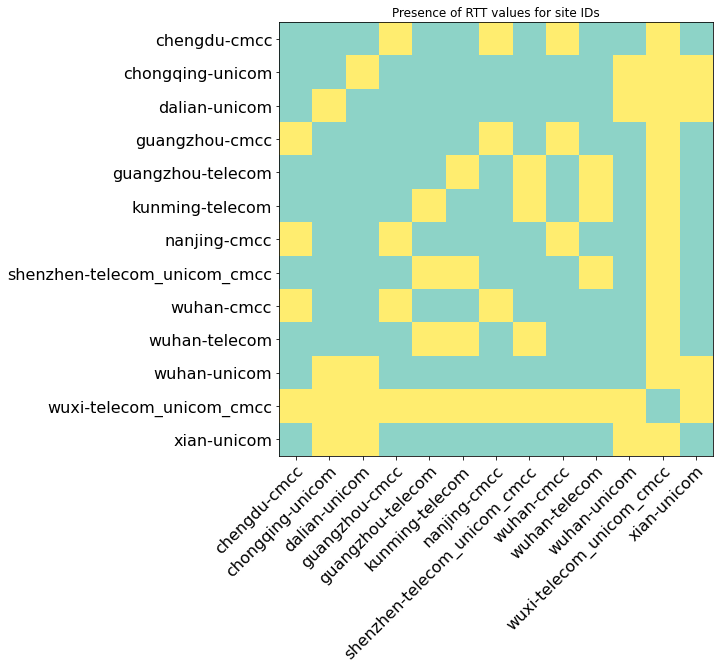

In [9]:
# Source: https://matplotlib.org/3.5.0/gallery/images_contours_and_fields/image_annotated_heatmap.html
fig, ax = plt.subplots(figsize=(10,10))

im = ax.imshow(rtt_site_indices,cmap='Set3')

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(unique_from_site_ids)), labels=unique_from_site_ids, fontsize=16)
ax.set_yticks(np.arange(len(unique_to_site_ids)), labels=unique_to_site_ids, fontsize=16)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
# for i in range(len(vegetables)):
#     for j in range(len(farmers)):
#         text = ax.text(j, i, harvest[i, j],
#                        ha="center", va="center", color="w")

ax.set_title("Presence of RTT values for site IDs")
fig.tight_layout()
plt.show()

In [10]:
test_df = pd.read_csv(DATASET_LOCATION + "/s_SITE_RTT.csv.gz", compression="gzip", nrows=50000)

test_df_by_site_id = test_df.groupby("from_site_id")
for (site_id, df_by_site_id) in test_df_by_site_id:
    print(df_by_site_id)

       from_site_id    to_site_id      rtt  loss  type      biz_ts  \
1133   chengdu-cmcc  nanjing-cmcc  30.5449   0.0  icmp  1590940800   
1134   chengdu-cmcc  nanjing-cmcc  31.3951   0.0  icmp  1590940920   
1135   chengdu-cmcc  nanjing-cmcc  31.2498   0.0  icmp  1590941040   
1136   chengdu-cmcc  nanjing-cmcc  32.1870   0.0  icmp  1590941160   
1137   chengdu-cmcc  nanjing-cmcc  30.8668   0.0  icmp  1590941280   
...             ...           ...      ...   ...   ...         ...   
34420  chengdu-cmcc  nanjing-cmcc  31.4886   0.0  icmp  1590995700   
34421  chengdu-cmcc  nanjing-cmcc  31.8084   0.0  icmp  1590995820   
34422  chengdu-cmcc  nanjing-cmcc  31.7464   0.0  icmp  1590995940   
34423  chengdu-cmcc  nanjing-cmcc  30.8200   0.0  icmp  1590996060   
34424  chengdu-cmcc  nanjing-cmcc  31.0749   0.0  icmp  1590996180   

                  biz_time          create_time  
1133   2020-06-01 00:01:00  2020-06-01 00:01:11  
1134   2020-06-01 00:03:00  2020-06-01 00:03:11  
1135   20

In [12]:
rtt_wuxi = rtt_df.loc[rtt_df["from_site_id"].str.startswith("wuxi")]
to_site_ids = sorted(rtt_wuxi["to_site_id"].unique())
for site_id in to_site_ids:
    subset_df = rtt_wuxi[rtt_wuxi["to_site_id"]==site_id]
    print("RTT statistics to site ID {}".format(site_id))
    print(subset_df["rtt"].describe())

RTT statistics to site ID chengdu-cmcc
count    43197.000000
mean        35.581805
std          2.360181
min          0.000000
25%         35.218800
50%         35.876500
75%         36.322500
max         39.725300
Name: rtt, dtype: float64
RTT statistics to site ID chongqing-unicom
count    43197.000000
mean        39.324575
std          2.666577
min         27.467600
25%         38.613500
50%         39.917500
75%         40.968100
max         51.238600
Name: rtt, dtype: float64
RTT statistics to site ID dalian-unicom
count    41950.000000
mean        43.349221
std          2.881101
min          0.000000
25%         43.196600
50%         44.212300
75%         44.960600
max         53.241100
Name: rtt, dtype: float64
RTT statistics to site ID guangzhou-cmcc
count    42779.000000
mean        32.677616
std          2.073584
min          0.000000
25%         32.187050
50%         32.805000
75%         33.388600
max         37.418600
Name: rtt, dtype: float64
RTT statistics to site ID gua